# Pandas Tips and Tricks

## 01- How to find the version

In [1]:
import pandas as pd
pd.__version__

'1.3.4'

In [2]:
# Another way
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19044
machine          : AMD64
processor        : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Pakistan.1252

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : 0.29.24
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: None
bs4              : 4.10.0
bottleneck       : 1.3.2
fsspe

## 02- Make a DataFrame

In [3]:
# Method 1
df = pd.DataFrame({
    'A Col': [1,2,3,7,8],
    'B Col': [4,5,6,34,65]
})
df.head()

,A Col,B Col
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [4]:
# Method 2
import numpy as np
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
pd.DataFrame(arr)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
# Method 3
pd.DataFrame(np.random.rand(4,8))

,0,1,2,3,4,5,6,7
0,0.262443,0.483676,0.789906,0.445719,0.136252,0.559958,0.147009,0.347417
1,0.280001,0.000549,0.216594,0.165982,0.183394,0.103213,0.676123,0.242696
2,0.705467,0.022715,0.404600,0.030551,0.709595,0.100663,0.719191,0.236025
3,0.662837,0.305511,0.740651,0.160672,0.236295,0.574736,0.637684,0.367113


In [6]:
# Method 4
pd.DataFrame(np.random.rand(4,9), columns=list('ABCDEFGHI'))

,A,B,C,D,E,F,G,H,I
0,0.779652,0.993084,0.992091,0.889988,0.328866,0.844554,0.005716,0.157522,0.914300
1,0.783581,0.827090,0.435010,0.726450,0.913124,0.208181,0.420027,0.807988,0.960341
2,0.231493,0.262570,0.850607,0.717956,0.899159,0.392331,0.380058,0.382277,0.989851
3,0.071663,0.869387,0.852132,0.176404,0.263959,0.983783,0.481264,0.287063,0.819558


## 03- How to Rename Columns

In [7]:
df = pd.DataFrame({
    'A Col': [1,2,3,7,8],
    'B Col': [4,5,6,34,65]
})
df.head()

,A Col,B Col
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [8]:
# Method 1
df.rename(columns={'A Col': 'Col_A', 'B Col': 'Col_B'}, inplace=True)
df.head()

,Col_A,Col_B
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [9]:
# Method 2
df.columns = ['col_aa', 'col_bb']
df.head()

,col_aa,col_bb
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [10]:
# Rename any Specific character
df.columns = df.columns.str.replace('_', '*')
df.head()

,col*aa,col*bb
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [11]:
# Adding prefix to columns
df = df.add_prefix('baba_')
df.head()

,baba_col*aa,baba_col*bb
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [12]:
# Adding suffix to columns
df = df.add_suffix('haha')
df.head()

,baba_col*aahaha,baba_col*bbhaha
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


In [13]:
df.columns = ['col_a', 'col_b']
df.head()

,col_a,col_b
0,1,4
1,2,5
2,3,6
3,7,34
4,8,65


## 04- Using Template Data

In [14]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# import dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
# Summary of Data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
# Saving Dataset
df.to_csv('tips.csv')
df.to_excel('tips.xlsx')

## 05- Using Your own Data

In [17]:
# import dataset from local drive
df = pd.read_csv('tips.csv')
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


## 06- Reverse Row Order

In [18]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# Reversing Row wise
df.loc[::-1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [20]:
# Reset the index number
df.loc[::-1].reset_index(drop=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


## 07- Reverse Column Order

In [21]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.loc[:, ::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


## 08- Select a Column by dtype

In [23]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [25]:
# Only select those have numeric dtype
df.select_dtypes(include=['number']).head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [26]:
# Only select those have object dtype
df.select_dtypes(include=['object']).head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [27]:
# Only select those have multiple dtype
df.select_dtypes(include=['object', 'number']).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,man,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,woman,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,woman,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,woman,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,man,Southampton,no


In [28]:
# exclude numeric dtype columns
df.select_dtypes(exclude=['number']).head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


## 09- Convert String into Numeric

In [29]:
df = pd.DataFrame({
    'col_A': ['1','2','3','4','5'],
    'col_B': ['11','23','3','47','5']
})
df.head()

,col_A,col_B
0,1,11
1,2,23
2,3,3
3,4,47
4,5,5


In [30]:
df.dtypes

col_A    object
col_B    object
dtype: object

In [31]:
# Converting string into int
df.astype({'col_A': 'float64', 'col_B': 'int64'}).dtypes

col_A    float64
col_B      int64
dtype: object

In [32]:
pd.to_numeric(df['col_A'], errors='coerce')

0    1
1    2
2    3
3    4
4    5
Name: col_A, dtype: int64

## 10- Reduce DataFrame Size

In [33]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [34]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 313.7 KB


In [35]:
# Getting random 10% of whole data as Sample
df.sample(frac=0.1).shape

(89, 15)

In [36]:
df.sample(frac=0.1).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 42 to 14
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     89 non-null     int64   
 1   pclass       89 non-null     int64   
 2   sex          89 non-null     object  
 3   age          80 non-null     float64 
 4   sibsp        89 non-null     int64   
 5   parch        89 non-null     int64   
 6   fare         89 non-null     float64 
 7   embarked     89 non-null     object  
 8   class        89 non-null     category
 9   who          89 non-null     object  
 10  adult_male   89 non-null     bool    
 11  deck         24 non-null     category
 12  embark_town  89 non-null     object  
 13  alive        89 non-null     object  
 14  alone        89 non-null     bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 32.9 KB


## 11- Copy Data from clip board

In [37]:
# Download Dataset
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.to_excel('titanic.xlsx')

In [38]:
# Read clipboard in python
df1 = pd.read_clipboard()
df1.head()

# Saving clipboard data
df1.to_csv('excel_ka_data.csv')

## 12- Split DataFrame into two subsets

In [39]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.shape

(891, 15)

In [41]:
from random import random
kashti_1 = df.sample(frac=0.50, random_state=1)
kashti_1.shape

(446, 15)

In [42]:
kashti_2 = df.drop(kashti_1.index)
kashti_2.shape

(445, 15)

In [43]:
kashti_1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False


In [44]:
kashti_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


## 13- Joining Two Datasets

In [45]:
# Appending both datasets
df1 = kashti_1.append(kashti_2)
df1.shape

(891, 15)

## 14- Filtering a Dataset

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
# finding unique values in sex column
df.sex.unique()

array(['male', 'female'], dtype=object)

In [48]:
# Filtering Female Data
df[(df.sex == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [49]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [50]:
# Multiple filtering
df[(df.embark_town == 'Southampton') & (df.sex == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [51]:
df[((df.embark_town == 'Southampton') | (df.embark_town == 'Queenstown')) & 
(df.sex == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [52]:
# Another way of filtering
df[df.embark_town.isin(['Queenstown', "Southampton"])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [53]:
df[df.age < 18].shape

(113, 15)

## 15- Filtering by Large Categories

In [54]:
df.shape

(891, 15)

In [55]:
# Getting values of each category
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [56]:
# How many male and females are there
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [57]:
# finding Largest categories i.e: age=24 are largest group
df.age.value_counts().nlargest(3)

24.0    30
22.0    27
18.0    26
Name: age, dtype: int64

In [58]:
# Top Three Age groups
counts = df.age.value_counts()
counts.nlargest(3).index

Float64Index([24.0, 22.0, 18.0], dtype='float64')

In [59]:
# Top Three Age groups
counts = df.who.value_counts()
counts.nlargest(3)

man      537
woman    271
child     83
Name: who, dtype: int64

In [60]:
# Filtering on based of 'who' column largst group i.e 'man'
df[df.who.isin(counts.nlargest(1).index)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 16- Splitting a string into multiple columns

In [61]:
# Import libraries
import pandas as pd

df = pd.DataFrame({'Name': ['Muhammad Waleed', 'Ali Afzal', 'Muhammad Ahmad'],
                    'Location': ['Islamabad, Pakistan', 'Lahore, Pakistan', 'Berlin, Germany'],})

df

,Name,Location
0,Muhammad Waleed,"Islamabad, Pakistan"
1,Ali Afzal,"Lahore, Pakistan"
2,Muhammad Ahmad,"Berlin, Germany"


In [62]:
# Split a column into two columns
df.Name.str.split(' ', expand=True)

,0,1
0,Muhammad,Waleed
1,Ali,Afzal
2,Muhammad,Ahmad


In [63]:
# Adding splits into new columns
df[['first_name', 'last_name']] = df.Name.str.split(' ', expand=True)
df

,Name,Location,first_name,last_name
0,Muhammad Waleed,"Islamabad, Pakistan",Muhammad,Waleed
1,Ali Afzal,"Lahore, Pakistan",Ali,Afzal
2,Muhammad Ahmad,"Berlin, Germany",Muhammad,Ahmad


In [64]:
# Splitting Location column and then adding to new columns
df[['City', 'Country']] = df.Location.str.split(', ', expand=True)
df

,Name,Location,first_name,last_name,City,Country
0,Muhammad Waleed,"Islamabad, Pakistan",Muhammad,Waleed,Islamabad,Pakistan
1,Ali Afzal,"Lahore, Pakistan",Ali,Afzal,Lahore,Pakistan
2,Muhammad Ahmad,"Berlin, Germany",Muhammad,Ahmad,Berlin,Germany


In [65]:
# Refine Data Manipulation
df = df[['first_name', 'last_name', 'City', 'Country']]
df

,first_name,last_name,City,Country
0,Muhammad,Waleed,Islamabad,Pakistan
1,Ali,Afzal,Lahore,Pakistan
2,Muhammad,Ahmad,Berlin,Germany


## 17- Aggregate by multiple groups/ functions

In [66]:
# Importing Libraries
import pandas as pd
import seaborn as sns

# Import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [67]:
# Details of Specific Column (who)
df.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [68]:
# Details of Specific Column (sex)
df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [69]:
# Total Elements
len(df.sex)

891

In [70]:
# Finding Number of categories in a column
len(df.groupby('who'))

3

In [71]:
# Grouping data based on multiple categories
df.groupby(['sex', 'pclass', 'who']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

## 18- Select specific rows and columns

In [72]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [73]:
# Select columns
df[['sex', 'class', 'deck']]

,sex,class,deck
0,male,Third,NaN
1,female,First,C
2,female,Third,NaN
3,female,First,C
4,male,Third,NaN
...,...,...,...
886,male,Second,NaN
887,female,First,B
888,female,Third,NaN
889,male,First,C


In [74]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
# Method 1: Selecting specific rows
df.describe().loc[['min','25%','50%','75%', 'max']]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [76]:
# Method 2: Selecting specific rows
df.describe().loc['min':'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [77]:
# Selecting specific rows with specific columns as well
df.describe().loc['min':'max', ['survived', 'age']]

,survived,age
min,0.0,0.420
25%,0.0,20.125
50%,0.0,28.000
75%,1.0,38.000
max,1.0,80.000


In [78]:
# Selecting specific rows with specific columns as well
df.describe().loc['min':'max', 'survived':'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


## 19- Reshape Multiindex Series

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
# Mean of a column
df.survived.mean()

0.3838383838383838

In [81]:
# Mean of both categories of a column
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [82]:
df.groupby(['sex', 'class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [83]:
df.groupby(['sex', 'class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 20- Continuous to Categorical Data Conversion

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [86]:
# Creating bins
df['age_groups'] = pd.cut(df.age, bins=[0,6,18,25,99], labels=['Childs', 'Adults', 'Y_Adults', 'Seniors'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Y_Adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Seniors
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Seniors
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Seniors
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Seniors


## 21- Converting one set of values into other

In [87]:
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [88]:
# Converting string into number and adding new column
df['sex_num'] = df.sex.map({'male':0, 'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Y_Adults,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Seniors,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Seniors,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Seniors,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Seniors,0


In [89]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
# it converts first value into 0 and then carry on. i.e 'S' = 0, 'C' = 1 etc
df['embarked_num'] = df.embarked.factorize()[0]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Y_Adults,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Seniors,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Seniors,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Seniors,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Seniors,0,0


## 22- Transpose a wide Dataframe

In [91]:
# Importing libraries
import pandas as pd
import numpy as np

# Creating dataframe
df = pd.DataFrame(np.random.rand(200, 26), columns=list('abcdefghijklmnopqrstuvwxyz'))
df.head(10)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.201703,0.135029,0.374172,0.763812,0.852855,0.132139,0.873590,0.088316,0.821946,0.054740,...,0.873884,0.241710,0.097130,0.700090,0.748450,0.871133,0.776842,0.700265,0.243160,0.360953
1,0.063368,0.147200,0.032335,0.563744,0.318301,0.728718,0.233408,0.319267,0.822457,0.904410,...,0.433036,0.404046,0.768738,0.276054,0.393116,0.229473,0.734242,0.607934,0.915527,0.514608
2,0.216120,0.336841,0.906176,0.391956,0.047098,0.606971,0.620351,0.715519,0.791418,0.423006,...,0.468293,0.119611,0.030742,0.424739,0.901006,0.668923,0.193554,0.142442,0.990259,0.848503
3,0.872670,0.950020,0.990168,0.765825,0.581282,0.741381,0.969179,0.323027,0.338753,0.243239,...,0.568251,0.528863,0.029448,0.989548,0.454280,0.666078,0.571974,0.221417,0.629646,0.599574
4,0.055473,0.858643,0.211557,0.477728,0.736888,0.375787,0.268674,0.250678,0.670422,0.213576,...,0.940291,0.441734,0.618799,0.459429,0.171408,0.876614,0.360369,0.147470,0.398544,0.359889
5,0.574941,0.934380,0.379117,0.663629,0.036117,0.993644,0.436906,0.387152,0.369340,0.817950,...,0.600148,0.952264,0.950338,0.785418,0.975484,0.890387,0.074264,0.922902,0.055370,0.983692
6,0.849177,0.842857,0.670421,0.863216,0.129854,0.035909,0.110452,0.443088,0.678845,0.894593,...,0.098708,0.909669,0.959967,0.906249,0.180830,0.023470,0.133108,0.723512,0.357414,0.489705
7,0.538195,0.451312,0.528153,0.365444,0.677603,0.775636,0.240745,0.301079,0.357944,0.068382,...,0.998741,0.396042,0.240140,0.906310,0.319072,0.432644,0.397888,0.038290,0.444793,0.994379
8,0.797661,0.962550,0.828348,0.181993,0.084051,0.314920,0.204264,0.409976,0.973265,0.557229,...,0.925317,0.950845,0.997877,0.924727,0.788528,0.420524,0.118947,0.368350,0.693848,0.940649
9,0.217576,0.107959,0.884347,0.269231,0.857867,0.118196,0.669781,0.167293,0.682184,0.469616,...,0.149417,0.790114,0.529446,0.475183,0.618486,0.173262,0.712356,0.396047,0.193693,0.110640


In [92]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
a,0.201703,0.063368,0.216120,0.872670,0.055473,0.574941,0.849177,0.538195,0.797661,0.217576
b,0.135029,0.147200,0.336841,0.950020,0.858643,0.934380,0.842857,0.451312,0.962550,0.107959
c,0.374172,0.032335,0.906176,0.990168,0.211557,0.379117,0.670421,0.528153,0.828348,0.884347
d,0.763812,0.563744,0.391956,0.765825,0.477728,0.663629,0.863216,0.365444,0.181993,0.269231
e,0.852855,0.318301,0.047098,0.581282,0.736888,0.036117,0.129854,0.677603,0.084051,0.857867
f,0.132139,0.728718,0.606971,0.741381,0.375787,0.993644,0.035909,0.775636,0.314920,0.118196
g,0.873590,0.233408,0.620351,0.969179,0.268674,0.436906,0.110452,0.240745,0.204264,0.669781
h,0.088316,0.319267,0.715519,0.323027,0.250678,0.387152,0.443088,0.301079,0.409976,0.167293
i,0.821946,0.822457,0.791418,0.338753,0.670422,0.369340,0.678845,0.357944,0.973265,0.682184
j,0.054740,0.904410,0.423006,0.243239,0.213576,0.817950,0.894593,0.068382,0.557229,0.469616


In [93]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.528171,0.518313,0.517858,0.491059,0.506671,0.496140,0.490907,0.492657,0.522402,0.499816,...,0.495873,0.506426,0.495764,0.529437,0.491643,0.500769,0.498108,0.495044,0.511081,0.498729
std,0.292466,0.288156,0.287364,0.273862,0.288931,0.296947,0.290487,0.286146,0.269645,0.296031,...,0.291104,0.306795,0.291017,0.273449,0.302485,0.279936,0.284294,0.274608,0.285375,0.293618
min,0.004028,0.001361,0.008827,0.001383,0.000049,0.001692,0.010223,0.004242,0.001739,0.002951,...,0.003682,0.003203,0.012493,0.008083,0.004285,0.001536,0.022584,0.001009,0.000416,0.007464
25%,0.280353,0.240546,0.284986,0.266538,0.266555,0.247857,0.239234,0.258948,0.320922,0.234566,...,0.255013,0.252481,0.244629,0.284341,0.192956,0.277577,0.241249,0.277240,0.291298,0.245526
50%,0.526299,0.527718,0.536833,0.500398,0.513259,0.482155,0.494505,0.454298,0.529469,0.501046,...,0.484183,0.487270,0.488967,0.540254,0.509703,0.482356,0.470944,0.474709,0.514128,0.475005
75%,0.794457,0.775000,0.797905,0.709122,0.739084,0.755492,0.749146,0.740823,0.740479,0.767219,...,0.764356,0.785846,0.750267,0.748748,0.754138,0.740042,0.750339,0.708001,0.744700,0.768704
max,0.999757,0.991683,0.990544,0.999384,0.998830,0.999227,0.989750,0.993873,0.999223,0.996669,...,0.998741,0.999851,0.998835,0.989548,0.988521,0.997523,0.999912,0.991892,0.999747,0.994379


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.528171,0.292466,0.004028,0.280353,0.526299,0.794457,0.999757
b,200.0,0.518313,0.288156,0.001361,0.240546,0.527718,0.775000,0.991683
c,200.0,0.517858,0.287364,0.008827,0.284986,0.536833,0.797905,0.990544
d,200.0,0.491059,0.273862,0.001383,0.266538,0.500398,0.709122,0.999384
e,200.0,0.506671,0.288931,0.000049,0.266555,0.513259,0.739084,0.998830
f,200.0,0.496140,0.296947,0.001692,0.247857,0.482155,0.755492,0.999227
g,200.0,0.490907,0.290487,0.010223,0.239234,0.494505,0.749146,0.989750
h,200.0,0.492657,0.286146,0.004242,0.258948,0.454298,0.740823,0.993873
i,200.0,0.522402,0.269645,0.001739,0.320922,0.529469,0.740479,0.999223
j,200.0,0.499816,0.296031,0.002951,0.234566,0.501046,0.767219,0.996669


## 23- Reshaping a DataFrame

In [95]:
fasla = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]], 
                        columns=['zip', 'factory', 'warehouse', 'retail'])
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


<AxesSubplot:xlabel='zip', ylabel='factory'>

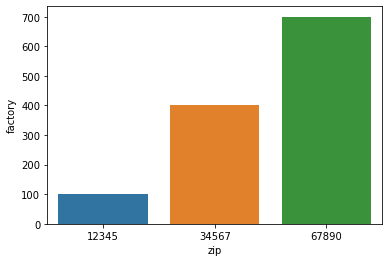

In [96]:
sns.barplot(x='zip', y='factory', data=fasla)

In [97]:
fasla.head().T

,0,1,2
zip,12345,34567,67890
factory,100,400,700
warehouse,200,500,800
retail,300,600,900


In [98]:
fasla2 = pd.DataFrame([[1, '12345', 'factory'], [2, '34567', 'warehouse']],  
                        columns=['user_id', 'zip', 'location_type'])
fasla2.head()

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [99]:
# melt function is useful to convert wide format into long format and for visualization
df = fasla.melt(id_vars='zip', var_name='location_type', value_name='distance')
df

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='zip', ylabel='distance'>

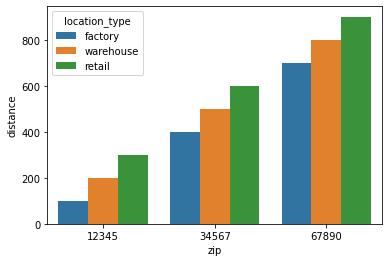

In [100]:
import seaborn as sns
sns.barplot(x='zip', y='distance', hue='location_type' ,data=df)